# Plot model performance

## Scaling behaviour

In [1]:
# Data
x_axis = [0.2, 0.4, 0.6, 0.8, 1.0]
y_axis = [0.2, 0.4, 0.6, 0.8, 1.0]
no_trust_with_map = [0.26, 0.0, 0.0, 0.0, 0.39]
no_trust_no_map = [0.0, 0.0, 0.0, 0.0, 0.0]
trust_no_map = [0.69, 0.0, 0.0, 0.0, 0.81]
trust_with_map = [0.0, 0.0, 0.0, 0.0, 0.0]


x_axis = [0.2, 0.6, 1.0]
y_axis = [0.2, 0.6, 1.0]
no_trust_with_map = [0.26, 0.39, 0.55]
no_trust_no_map = [0.29, 0.41, 0.51 ]
trust_no_map = [0.34, 0.35, 0.5]
trust_with_map = [0.2, 0.25, 0.4]




In [9]:
import json
def extract_avg_acc_from_json(filename,top_k=3):
    assert top_k in [1,3,5]
    if top_k == 1:
        appendix = '_acc'
    elif top_k == 3:
        appendix = '_top3'
    elif top_k == 5:
        appendix = '_top5'
    with open(filename) as f:
        data = json.load(f)
    accuracy = 1
    for i in range(1,6):
        accuracy *=data[f'mol{i}{appendix}']
    return accuracy    
    

In [10]:
extract_avg_acc_from_json('/Users/dsw46/Projects_local/gen_orderly_data/ORDerly/models/no_trust_with_map/test_metrics.json')

0.3868867751372443

In [11]:
extract_avg_acc_from_json('/Users/dsw46/Projects_local/gen_orderly_data/ORDerly/models/no_trust_with_map_20/test_metrics.json')

0.2649152956699739

In [12]:
extract_avg_acc_from_json('/Users/dsw46/Projects_local/gen_orderly_data/ORDerly/models/with_trust_no_map/test_metrics.json')

0.8160219003576087

In [13]:
extract_avg_acc_from_json('/Users/dsw46/Projects_local/gen_orderly_data/ORDerly/models/with_trust_no_map_20/test_metrics.json')

0.6994980836568517

## Plotting

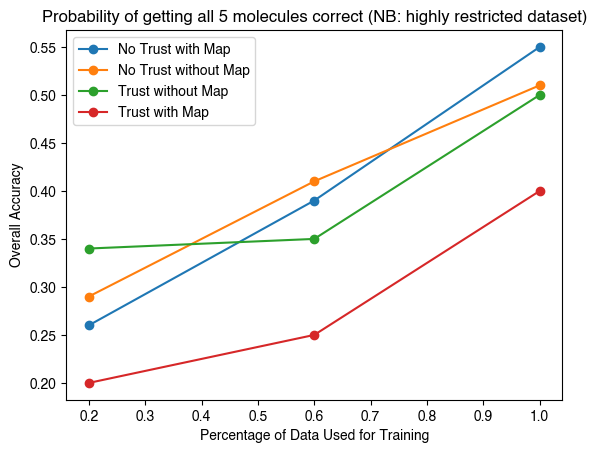

In [2]:
import matplotlib.pyplot as plt
import os


# Plotting
plt.plot(x_axis, no_trust_with_map,'o-', label='No Trust with Map')
plt.plot(x_axis, no_trust_no_map,'o-', label='No Trust without Map')
plt.plot(x_axis, trust_no_map, 'o-',label='Trust without Map')
plt.plot(x_axis, trust_with_map, 'o-',label='Trust with Map')

# Add labels and title
plt.xlabel('Percentage of Data Used for Training')
plt.ylabel('Overall Accuracy')
plt.title('Probability of getting all 5 molecules correct (NB: highly restricted dataset)')



# Add legend
plt.legend()

# Set the path for saving the plot
save_path = os.path.expanduser("~/Downloads/")
file_name = "Scaling_behaviour.png"
file_path = os.path.join(save_path, file_name)

# Save the plot
plt.savefig(file_path, dpi=600)

In [6]:
# Extract accuracy from json files
import json
path = "/Users/dsw46/Projects_local/tiny_orderly/ORDerly/models/no_trust_no_map/naive_top_3.json"
data = json.load(open(path))
print("solvents:", (data['solvent_000']+data['solvent_001'])/2)
print("agents:", (data['agent_000']+data['agent_001']+data['agent_002'])/3)
print("all: ", (data['solvent_000']+data['solvent_001']+data['agent_000']+data['agent_001']+data['agent_002'])/5)


solvents: 0.6408507223113965
agents: 0.8093900481540931
all:  0.7419743178170144


In [4]:
data

{'solvent_000': 0.47953451043338685,
 'solvent_001': 0.8021669341894061,
 'agent_000': 0.6685393258426966,
 'agent_001': 0.8081861958266453,
 'agent_002': 0.9514446227929374}

In [5]:
int(None)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'